In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom, beta

In [3]:
# population parameter
p = 0.3
# generating toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size = N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


Text(0, 0.5, 'p(theta)')

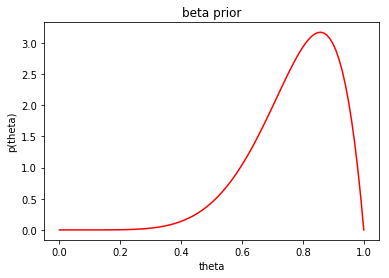

In [4]:
# choose your belief parameter
a = 7; b = 2

prior = beta(a,b)
theta = np.linspace(0,1,100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

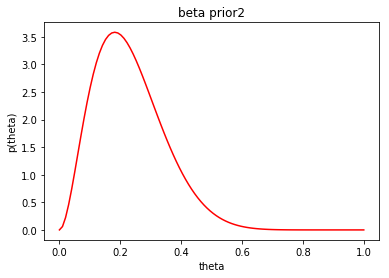

In [5]:
# you can always reflect other belief by tweaking your parameter
a2 = 3; b2 = 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(theta, prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 0.0005)

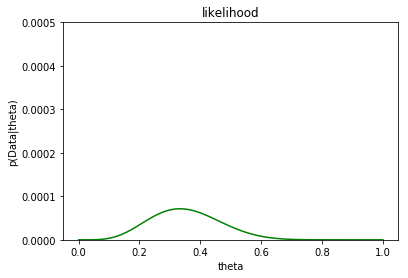

In [6]:
def likelihood (D,p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc)

plt.plot(theta, likelihood(data,theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

Text(0, 0.5, 'p(theta)')

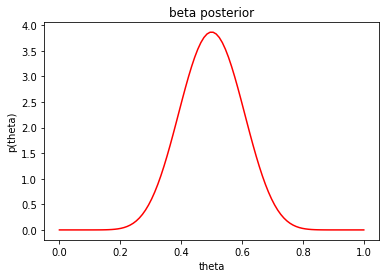

In [7]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(theta, posterior.pdf(theta), color ='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

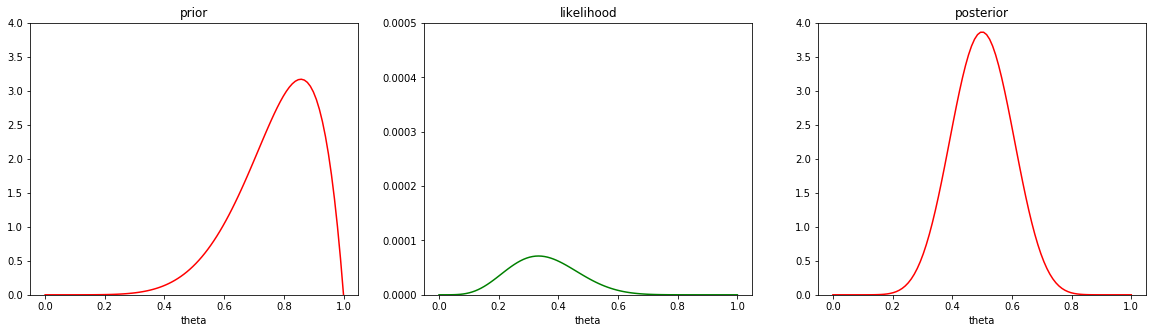

In [8]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

In [10]:
from scipy.stats import norm
# population parameter
mu = 20
sigma = 2

# generate toy sample
## lmda = sigma**(-2)
N = 30
np.random.seed(101)
data2 = norm.rvs(loc=mu, scale=sigma, size=N)
print(data2)
print(np.mean(data2))
print(np.std(data2))
xbar = np.mean(data2); lmda = np.sqrt(1/np.std(data2))

[25.414 21.256 21.816 21.008 21.302 19.361 18.304 21.212 15.964 21.48
 21.058 18.822 20.377 18.482 18.134 21.91  20.382 23.958 25.212 21.367
 20.605 23.387 16.588 17.682 19.73  20.781 20.334 20.369 21.615 20.146]
20.601856358956397
2.1494924629198304


Text(0.5, 0, 'mu')

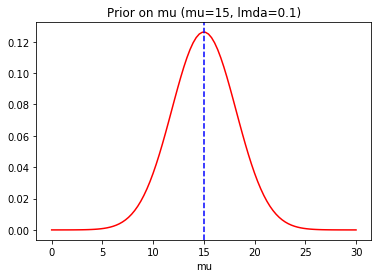

In [13]:
# choose yout belief parameter
prior_mu = 15
prior_lmda = 0.1

prior = norm(loc=prior_mu, scale=prior_lmda**(-1/2))
theta = np.linspace(0,30,100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.axvline(prior_mu, color='b', linestyle='--')
plt.title('Prior on mu (mu=15, lmda=0.1)')
plt.xlabel('mu')

Text(0, 0.5, 'log_p(data|mu)')

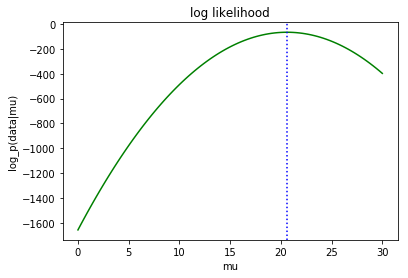

In [14]:
import math
def log_likelihood(x, mu):
    log_l = 0
    for i in x:
        log_l += np.log(norm.pdf(i,mu,2)) #sigma is knowm
    return log_l
        
theta = np.linspace(0,30,100)
plt.plot(theta, log_likelihood(data2, theta), color='g')
plt.axvline(xbar, color='b', linestyle=':') #정규분포의 mle: mu -> 표본평균
plt.title('log likelihood')
plt.xlabel('mu')
plt.ylabel('log_p(data|mu)')

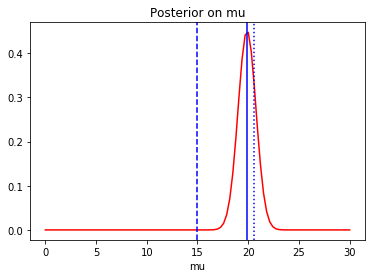

In [15]:
# Belief update
post_mu = (prior_lmda*prior_mu + lmda*xbar) / (prior_lmda+lmda)
post_lmda = prior_lmda + lmda

posterior = norm(post_mu, np.sqrt(post_lmda))
theta = np.linspace(0,30,100)
plt.plot(theta, posterior.pdf(theta), color='r')
plt.title('Posterior on mu')
plt.xlabel('mu')
plt.axvline(post_mu, color='b')
plt.axvline(prior_mu, color='b', linestyle='--')
plt.axvline(xbar, color='b', linestyle=':')

(0, 0.5)

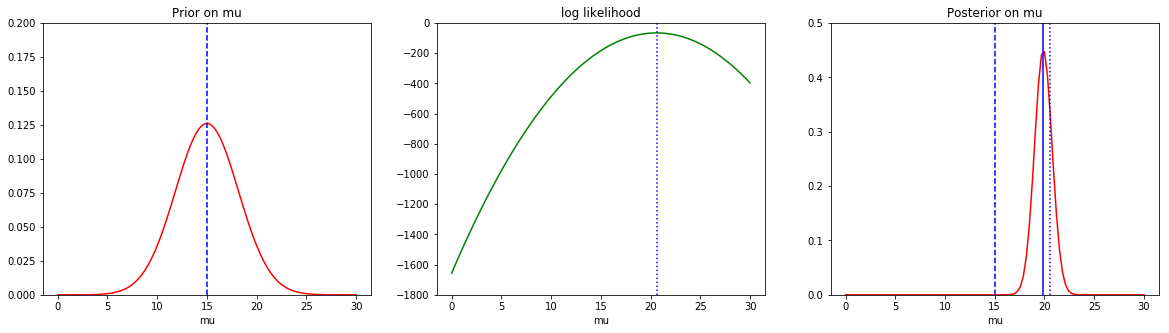

In [17]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color='r')
plt.axvline(prior_mu, color='b', linestyle='--')
ax1.set_title('Prior on mu')
ax1.set_xlabel('mu')
ax1.set_ylim(0,0.20)

ax2 = fig.add_subplot(132)
ax2.plot(theta, log_likelihood(data2, theta), color='g')
plt.axvline(xbar, color='b', linestyle=':')
ax2.set_title('log likelihood')
ax2.set_xlabel('mu')
ax2.set_ylim(-1800,0)

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), color='r')
plt.axvline(post_mu, color='b')
plt.axvline(prior_mu, color='b', linestyle='--')
plt.axvline(xbar, color='b', linestyle=':')
ax3.set_title('Posterior on mu')
ax3.set_xlabel('mu')
ax3.set_ylim(0,0.50)